In [11]:
import bs4
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
from unidecode import unidecode
import pandas as pd
import datetime
from dateutil.parser import parse
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def scrape_data(start_date, from_place, to_place, city_name):

    driver = webdriver.Chrome()
    driver.get('https://www.google.com/flights/explore/')
    time.sleep(1.5)
    #input to_place
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    actions = ActionChains(driver)
    actions.send_keys(to_place)
    actions.send_keys(Keys.ENTER)
    actions.perform()
    time.sleep(0.5)
    #input from_place
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    to_input.click()
    actions = ActionChains(driver)
    actions.send_keys(from_place)
    actions.send_keys(Keys.ENTER)
    actions.perform()
    time.sleep(0.5)
    #input start_date
    driver.get(driver.current_url[:-10]+start_date)
    time.sleep(0.5)
    #find the city_name
    data = []
    city_name0=unicode(city_name,'utf-8')
    city_name_unicode=unidecode(city_name0)
    city_name1=city_name_unicode.lower().split(' ')
    city_name2=''
    for i in range(len(city_name1)):
        city_name2=city_name2+city_name1[i][0].upper()+city_name1[i][1:]+' '
    city_name2=city_name2.strip()
    results = driver.find_elements_by_class_name('LJTSM3-v-d')
    for result in results:
        if city_name2 in result.text:
            bars = result.find_elements_by_class_name('LJTSM3-w-x')

            for bar in bars:
                ActionChains(driver).move_to_element(bar).perform()
                time.sleep(0.0001)
                data.append((result.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
                             result.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
        else:
            pass
    time.sleep(0.01)
    driver.quit()
    return data

In [20]:
flight_data=scrape_data('2017-04-30','Chicago','America','boston')
len(flight_data)

60

In [2]:
def scrape_data(start_date, from_place, to_place, city_name):

    driver = webdriver.Chrome()
    driver.get('https://www.google.com/flights/explore/')
    time.sleep(1.5)
    #driver.get('https://www.google.com/flights/explore/')
    #input to_place
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    actions = ActionChains(driver)
    actions.send_keys(to_place)
    actions.send_keys(Keys.ENTER)
    actions.perform()
    time.sleep(0.5)
    #input from_place
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    to_input.click()
    actions = ActionChains(driver)
    actions.send_keys(from_place)
    actions.send_keys(Keys.ENTER)
    actions.perform()
    time.sleep(0.5)
    #input start_date
    driver.get(driver.current_url[:-10]+start_date)
    time.sleep(0.5)
    #find the city_name
    data = []
    city_name0=unicode(city_name,'utf-8')
    city_name_unicode=unidecode(city_name0)
    city_name1=city_name_unicode.lower().split(' ')
    city_name2=''
    for i in range(len(city_name1)):
        city_name2=city_name2+city_name1[i][0].upper()+city_name1[i][1:]+' '
    city_name2=city_name2.strip()
    results = driver.find_elements_by_class_name('LJTSM3-v-d')
    for result in results:
        if city_name2 in result.text:
            bars = result.find_elements_by_class_name('LJTSM3-w-x')

            for bar in bars:
                ActionChains(driver).move_to_element(bar).perform()
                time.sleep(0.0001)
                data.append((result.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
                             result.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
        else:
            pass
    time.sleep(0.5)
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[4]/div/div[2]/div[1]/div/div[2]/div[2]/div/div[2]/div[5]/div')
    to_input.click()
    time.sleep(0.5)
    results = driver.find_elements_by_class_name('LJTSM3-v-d')
    for result in results:
        if city_name2 in result.text:
            bars = result.find_elements_by_class_name('LJTSM3-w-x')

            for bar in bars:
                ActionChains(driver).move_to_element(bar).perform()
                time.sleep(0.0001)
                data.append((result.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
                             result.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
        else:
            pass

    data=data[:60]+data[-30:]
    driver.quit()
    return data

In [3]:
flight_data=scrape_data('2017-04-30','Chicago','America','boston')
flight_data

[(u'$256', u'Sun Apr 30 - Wed May 3'),
 (u'$194', u'Mon May 1 - Thu May 4'),
 (u'$133', u'Tue May 2 - Sat May 6'),
 (u'$113', u'Wed May 3 - Sat May 6'),
 (u'$158', u'Thu May 4 - Tue May 9'),
 (u'$148', u'Fri May 5 - Tue May 9'),
 (u'$113', u'Sat May 6 - Tue May 9'),
 (u'$211', u'Sun May 7 - Wed May 10'),
 (u'$178', u'Mon May 8 - Thu May 11'),
 (u'$113', u'Tue May 9 - Sat May 13'),
 (u'$113', u'Wed May 10 - Sat May 13'),
 (u'$178', u'Thu May 11 - Tue May 16'),
 (u'$196', u'Fri May 12 - Tue May 16'),
 (u'$113', u'Sat May 13 - Wed May 17'),
 (u'$196', u'Sun May 14 - Wed May 17'),
 (u'$194', u'Mon May 15 - Thu May 18'),
 (u'$113', u'Tue May 16 - Sat May 20'),
 (u'$113', u'Wed May 17 - Sat May 20'),
 (u'$230', u'Thu May 18 - Tue May 23'),
 (u'$216', u'Fri May 19 - Tue May 23'),
 (u'$113', u'Sat May 20 - Wed May 24'),
 (u'$231', u'Sun May 21 - Wed May 24'),
 (u'$250', u'Mon May 22 - Sat May 27'),
 (u'$133', u'Tue May 23 - Sat May 27'),
 (u'$153', u'Wed May 24 - Sat May 27'),
 (u'$250', u'Thu

In [12]:
def task_3_dbscan(flight_data):
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), 
               (parse(d[1].split('-')[0].strip()) - parse(flight_data[0][1].split('-')[0].strip())).days, 
               reduce(lambda x,y: y-x, [parse(x.strip()) for x in d[1].split('-')]).days) for d in flight_data]
    df = pd.DataFrame(clean_data, columns=['Price', 'Start_Date', 'Trip_Length'])

    X = StandardScaler().fit_transform(df[['Start_Date', 'Price']])
    db = DBSCAN(eps=.5, min_samples=3).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
                markeredgecolor='k', markersize=14)
    
    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)
    df['dbscan_labels'] = db.labels_
    plt.savefig('task_3_dbscan.png')
    outliers=df[df['dbscan_labels']==-1].copy()
    outliers_1=zip(outliers.Start_Date,outliers.Price)
    clusters=df[df['dbscan_labels']!=-1].copy()
    clusters_1=zip(clusters.Start_Date,clusters.Price,clusters.dbscan_labels)
    outliers_label=[]
    for outlier in outliers_1:
        min_cluster_label = -1
        min_dist = 9999
        for cluster in clusters_1:
            dist=(float(outlier[0])-float(cluster[0]))**2+((float(outlier[1])-float(cluster[1]))/100)**2
            # I think the weight of date in distance is more important than weight of price. Therefore, I did not use Euclidean distance.
            if dist < min_dist:
                min_dist = dist
                min_cluster_label = cluster[2]
        outliers_label.append(min_cluster_label)
    outliers_2=zip(outliers.Start_Date,outliers.Price,outliers_label)
    agg = df[df['dbscan_labels']!=-1].groupby('dbscan_labels')['Start_Date','Price'].agg(['std','mean','count']).copy()
    outliers_3=[]
    for outlier in outliers_2:
        mean=agg[agg.index==outlier[2]]['Price']['mean']
        std=max(float(agg[agg.index==outlier[2]]['Price']['std']),10)
        line=max(float(mean-2*std),50)
        if outlier[1]<line:
            outliers_3.append(outlier[0])
    if len(outliers_3)==0:
        return 'There is no low price outlier.'
    else:
        return df.loc[outliers_3]

'There is no low price outlier.'

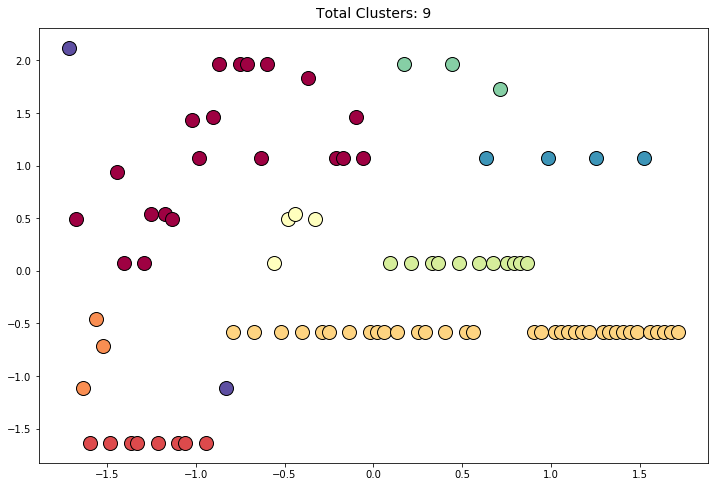

In [13]:
task_3_dbscan(flight_data)

In [14]:
def task_3_IQR(flight_data):
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), 
               (parse(d[1].split('-')[0].strip()) - parse(flight_data[0][1].split('-')[0].strip())).days, 
               reduce(lambda x,y: y-x, [parse(x.strip()) for x in d[1].split('-')]).days) for d in flight_data]
    df = pd.DataFrame(clean_data, columns=['Price', 'Start_Date', 'Trip_Length'])
    plt.boxplot(df['Price']);
    plt.savefig('task_3_iqr.png')
    Q1 = df.Price.describe()['25%']
    Q3 = df.Price.describe()['75%']
    IQR = Q3 - Q1
    low_line = Q1 - 1.5 * IQR
    result = df[df['Price'] < low_line]
    if len(result) == 0:
        return 'No outliers'
    else:
        return result

'No outliers'

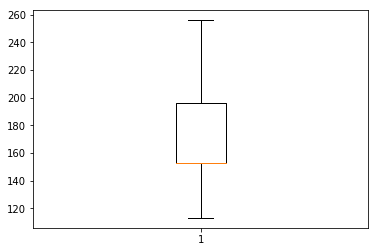

In [15]:
task_3_IQR(flight_data)

In [16]:
def task_4_dbscan(flight_data):
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), 
               (parse(d[1].split('-')[0].strip()) - parse(flight_data[0][1].split('-')[0].strip())).days, 
               reduce(lambda x,y: y-x, [parse(x.strip()) for x in d[1].split('-')]).days) for d in flight_data]
    df = pd.DataFrame(clean_data, columns=['Price', 'Start_Date', 'Trip_Length'])    
    X = df[['Start_Date', 'Price']].values*np.array([20,1])
    radius = np.sqrt(np.square(20.00) + np.square(20.00))
    db = DBSCAN(eps=radius, min_samples=3).fit(X)

    df['dbscan_labels'] = db.labels_
    
    clusters=df.dbscan_labels.unique()
    clusters_5=[]
    for cluster in clusters:
        if cluster!=-1 and len(df[df['dbscan_labels']==cluster])>4:
            for i in range(len(df[df['dbscan_labels']==cluster])-4):
                clusters_5.append(df[df['dbscan_labels']==cluster]['Start_Date'].values[i:i+5])
    mean_min=9999
    cluster_mean_min=[]
    for cluster_5 in clusters_5:
        df_5=df.loc[cluster_5][['Start_Date','Price']]
        cluster_max=df_5['Price'].max()
        cluster_min=df_5['Price'].min()
        cluster_mean=df_5['Price'].mean()
        if cluster_max-cluster_min<=20 and cluster_mean < mean_min:
            mean_min=cluster_mean
            cluster_mean_min=cluster_5
        else:
            pass
    if len(cluster_mean_min)==0:
        return 'No required value'
    else:
        return df.loc[cluster_mean_min]

In [17]:
task_4_dbscan(flight_data)

,Price,Start_Date,Trip_Length,dbscan_labels
71,153.0,71,5,2
72,153.0,72,4,2
73,153.0,73,3,2
74,153.0,74,5,2
75,153.0,75,5,2


In [721]:
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), 
               (parse(d[1].split('-')[0].strip()) - parse(flight_data[0][1].split('-')[0].strip())).days, 
               reduce(lambda x,y: y-x, [parse(x.strip()) for x in d[1].split('-')]).days) for d in flight_data]
    df = pd.DataFrame(clean_data, columns=['Price', 'Start_Date', 'Trip_Length'])    
    X = df[['Start_Date', 'Price']].values*np.array([20,1])
    radius = np.sqrt(np.square(20.00) + np.square(20.00))
    db = DBSCAN(eps=radius, min_samples=3).fit(X)

    df['dbscan_labels'] = db.labels_

In [725]:
    clusters=df.dbscan_labels.unique()
    clusters

array([-1,  0,  1,  2,  3,  4])

In [722]:

    clusters_5=[]
    for cluster in clusters:
        if cluster!=-1:
            if len(df[df['dbscan_labels']==cluster])>4:
                clusters_5.append(cluster)
        else:
            pass



In [727]:
clusters_5

[2, 3, 4]

In [ ]:
    mean_min=9999
    cluster_mean_min=[]
    for cluster_5 in clusters_5:
        df_5=df.loc[cluster_5][['Start_Date','Price']]
        cluster_max=df_5['Price'].max()
        cluster_min=df_5['Price'].min()
        cluster_mean=df_5['Price'].mean()

        if cluster_max-cluster_min<=20 and cluster_mean < mean_min:
            mean_min=cluster_mean
            cluster_mean_min=cluster_5
        else:
            pass

In [728]:
cluster_mean_min

3

In [525]:
import pandas as pd
import datetime
%matplotlib inline
from dateutil.parser import parse

clean_data = [(float(d[0].replace('$', '').replace(',', '')), 
               (parse(d[1].split('-')[0].strip()) - parse(flight_data[0][1].split('-')[0].strip())).days, 
               reduce(lambda x,y: y-x, [parse(x.strip()) for x in d[1].split('-')]).days) for d in flight_data]
clean_data

[(256.0, 0, 3),
 (194.0, 1, 3),
 (133.0, 2, 4),
 (113.0, 3, 3),
 (158.0, 4, 5),
 (148.0, 5, 4),
 (113.0, 6, 3),
 (211.0, 7, 3),
 (178.0, 8, 3),
 (113.0, 9, 4),
 (113.0, 10, 3),
 (178.0, 11, 5),
 (196.0, 12, 4),
 (113.0, 13, 4),
 (196.0, 14, 3),
 (194.0, 15, 3),
 (113.0, 16, 4),
 (113.0, 17, 3),
 (230.0, 18, 5),
 (216.0, 19, 4),
 (113.0, 20, 4),
 (231.0, 21, 3),
 (250.0, 22, 5),
 (133.0, 23, 4),
 (153.0, 24, 3),
 (250.0, 25, 5),
 (250.0, 26, 5),
 (153.0, 27, 3),
 (216.0, 28, 3),
 (250.0, 29, 5),
 (178.0, 30, 4),
 (153.0, 31, 3),
 (194.0, 32, 5),
 (196.0, 33, 5),
 (153.0, 34, 3),
 (245.0, 35, 3),
 (194.0, 36, 3),
 (153.0, 37, 4),
 (153.0, 38, 3),
 (216.0, 39, 5),
 (216.0, 40, 4),
 (153.0, 41, 5),
 (231.0, 42, 4),
 (216.0, 43, 5),
 (153.0, 44, 4),
 (153.0, 45, 3),
 (153.0, 46, 5),
 (178.0, 47, 4),
 (153.0, 48, 4),
 (250.0, 49, 3),
 (178.0, 50, 5),
 (153.0, 51, 4),
 (153.0, 52, 3),
 (178.0, 53, 5),
 (178.0, 54, 5),
 (153.0, 55, 3),
 (250.0, 56, 3),
 (178.0, 57, 5),
 (153.0, 58, 4),
 (153.0

In [553]:
radius = np.sqrt(np.square(20.00) + np.square(20.00))
radius

28.284271247461902

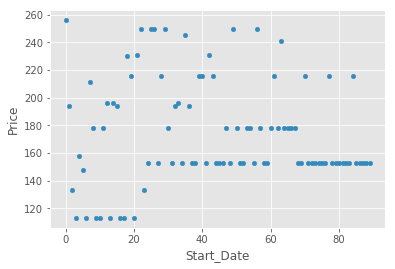

In [703]:
df = pd.DataFrame(clean_data, columns=['Price', 'Start_Date', 'Trip_Length'])
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

# Pandas has a ton of built-in visualizations
# Play and Learn
# http://pandas.pydata.org/pandas-docs/stable/visualization.html
df.plot.scatter(x='Start_Date', y='Price')

In [571]:
df = df.set_value(12, 'Price', 20)
df = df.set_value(13, 'Price', 25)
df = df.set_value(14, 'Price', 40)
df = df.set_value(15, 'Price', 20)
df = df.set_value(16, 'Price', 25)
df = df.set_value(17, 'Price', 40)
df = df.set_value(18, 'Price', 50)
df = df.set_value(19, 'Price', 60)
# Time for a Google Investigation
# "IQR Outlier"

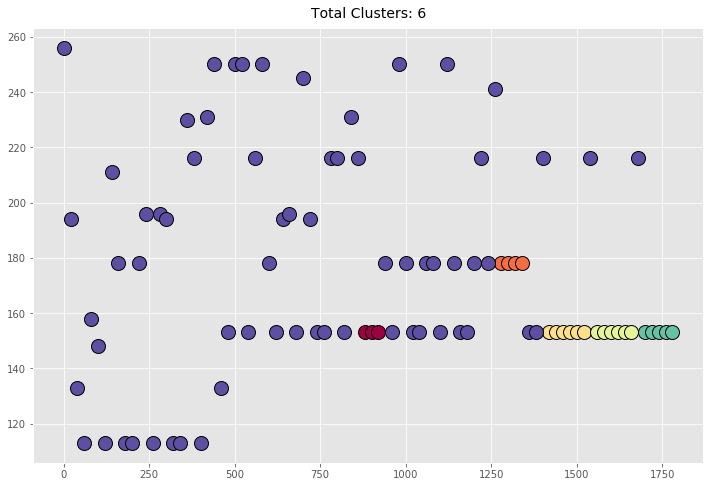

In [704]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
# All of pandas' viz is built on top of matplotlib as you might have noticed
# You can get started learning matplotlib here: http://matplotlib.org/users/pyplot_tutorial.html


# df = df.set_value(49, 'Price', 255)
# X = StandardScaler().fit_transform(df[['Start_Date', 'Price']])
  
X = df[['Start_Date', 'Price']].values*np.array([20,1])
radius = np.sqrt(np.square(20.00) + np.square(20.00))
db = DBSCAN(eps=radius, min_samples=3).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
 
plt.subplots(figsize=(12,8))
 
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
            markeredgecolor='k', markersize=14)
 
plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)
df['dbscan_labels'] = db.labels_

In [705]:
clusters=df.dbscan_labels.unique()
clusters

array([-1,  0,  1,  2,  3,  4])

In [706]:
clusters_5=[]
for cluster in clusters:
    if cluster!=-1 and len(df[df['dbscan_labels']==cluster])>4:
        for i in range(len(df[df['dbscan_labels']==cluster])-4):
            clusters_5.append(df[df['dbscan_labels']==cluster]['Start_Date'].values[i:i+5])
    else:
        pass
clusters_5

[array([71, 72, 73, 74, 75]),
 array([72, 73, 74, 75, 76]),
 array([78, 79, 80, 81, 82]),
 array([79, 80, 81, 82, 83]),
 array([85, 86, 87, 88, 89])]

In [707]:
mean_min=9999
cluster_mean_min=''
for cluster_5 in clusters_5:
    df_5=df.loc[cluster_5][['Start_Date','Price']]
    cluster_max=df_5['Price'].max()
    cluster_min=df_5['Price'].min()
    cluster_mean=df_5['Price'].mean()

    if cluster_max-cluster_min<=20 and cluster_mean < mean_min:
        mean_min=cluster_mean
        cluster_mean_min=cluster_5
    else:
        pass

In [711]:
df.loc[cluster_mean_min]

,Price,Start_Date,Trip_Length,dbscan_labels
71,153.0,71,5,2
72,153.0,72,4,2
73,153.0,73,3,2
74,153.0,74,5,2
75,153.0,75,5,2


In [709]:
cluster_mean_min

array([71, 72, 73, 74, 75])

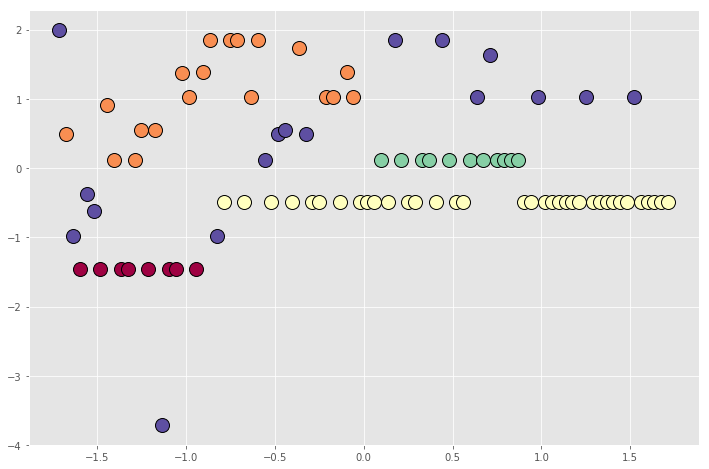

In [512]:
plt.subplots(figsize=(12,8))
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
            markeredgecolor='k', markersize=14)

In [504]:
    start_date = parse(flight_data[0][1].split('-')[0].strip())
    db = DBSCAN(eps=radius, min_samples=3).fit(X)
    df['label'] = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    list_of_dfs = []
    for label in unique_labels:
        if label != -1:
            one_cluster = df[df.label == label]

            # find start/end date for every 5-day-consecutive period
            consecutive_list = []
            days = one_cluster.Start_Date.values
            for i in range(len(days) - 4):
                if days[i + 4] - days[i] == 4:
                    consecutive_list.append((days[i], days[i + 4]))

            # a list of 5-day-consecutive period dataframes
            for start, end in consecutive_list:
                df_five_day = one_cluster.loc[start - 1:end - 1, ['Start_Date', 'Price']]

                if df_five_day.Price.describe()['max'] - df_five_day.Price.describe()['min'] <= 20:
                    df_five_day.Start_Date = df_five_day.Start_Date.apply(
                        lambda x: (start_date + datetime.timedelta(
                            days=x - 1)).strftime('%Y-%m-%d'))
                    list_of_dfs.append(df_five_day)
    means = [one_df.Price.mean() for one_df in list_of_dfs]
    df_min_index = means.index(min(means))

In [507]:
list_of_dfs[df_min_index]

,Start_Date,Price
71,2017-07-09,153.0
72,2017-07-10,153.0
73,2017-07-11,153.0
74,2017-07-12,153.0


In [319]:
outliers=df[df['dbscan_labels']==-1].copy()
outliers_1=zip(outliers.Start_Date,outliers.Price)
outliers_1

[(10, 40.0), (15, 200.0), (23, 557.0), (24, 785.0), (25, 634.0), (26, 712.0)]

In [320]:
clusters=df[df['dbscan_labels']!=-1].copy()
clusters_1=zip(clusters.Start_Date,clusters.Price,clusters.dbscan_labels)
clusters_1

[(0, 476.0, 0),
 (1, 431.0, 0),
 (2, 476.0, 0),
 (3, 481.0, 0),
 (4, 499.0, 0),
 (5, 476.0, 0),
 (6, 451.0, 0),
 (7, 476.0, 0),
 (8, 431.0, 0),
 (9, 450.0, 0),
 (11, 431.0, 0),
 (12, 476.0, 0),
 (13, 480.0, 0),
 (14, 476.0, 0),
 (16, 425.0, 0),
 (17, 521.0, 1),
 (18, 518.0, 1),
 (19, 518.0, 1),
 (20, 518.0, 1),
 (21, 518.0, 1),
 (22, 518.0, 1),
 (27, 520.0, 1),
 (28, 525.0, 1),
 (29, 495.0, 1),
 (30, 477.0, 1),
 (31, 495.0, 1),
 (32, 520.0, 1),
 (33, 518.0, 1),
 (34, 517.0, 1),
 (35, 520.0, 1),
 (36, 520.0, 1),
 (37, 518.0, 1),
 (38, 480.0, 1),
 (39, 521.0, 1),
 (40, 518.0, 1),
 (41, 518.0, 1),
 (42, 520.0, 1),
 (43, 520.0, 1),
 (44, 525.0, 1),
 (45, 521.0, 1),
 (46, 521.0, 1),
 (47, 490.0, 1),
 (48, 435.0, 1),
 (49, 521.0, 1),
 (50, 482.0, 1),
 (51, 450.0, 1),
 (52, 429.0, 1),
 (53, 530.0, 1),
 (54, 620.0, 1),
 (55, 591.0, 1),
 (56, 561.0, 1),
 (57, 566.0, 1),
 (58, 507.0, 1),
 (59, 509.0, 1),
 (60, 521.0, 1),
 (61, 521.0, 1),
 (62, 518.0, 1),
 (63, 520.0, 1),
 (64, 520.0, 1),
 (65, 5

In [321]:
outliers_label=[]
for outlier in outliers_1:
    min_cluster_label = -1
    min_dist = 9999
    for cluster in clusters_1:
        dist=(float(outlier[0])-float(cluster[0]))**2+((float(outlier[1])-float(cluster[1]))/100)**2
        if dist < min_dist:
            min_dist = dist
            min_cluster_label = cluster[2]
    outliers_label.append(min_cluster_label)
outliers_label
outliers_2=zip(outliers.Start_Date,outliers.Price,outliers_label)
outliers_2

[(10, 40.0, 0),
 (15, 200.0, 0),
 (23, 557.0, 1),
 (24, 785.0, 1),
 (25, 634.0, 1),
 (26, 712.0, 1)]

In [322]:
agg = df[df['dbscan_labels']!=-1].groupby('dbscan_labels')['Start_Date','Price'].agg(['std','mean','count']).copy()
agg

Start_Date                       Price                  
                     std       mean count        std        mean count
dbscan_labels                                                         
0               4.997142   7.400000    15  23.521014  462.333333    15
1              20.640356  54.652174    69  41.540523  530.869565    69

In [323]:
mean=agg[agg.index==outliers_2[0][2]]['Price']['mean']
std=agg[agg.index==outliers_2[0][2]]['Price']['std']
max(float(mean-2*std),50)

415.2913055182786

In [324]:
outliers_3=[]
for outlier in outliers_2:
    mean=agg[agg.index==outlier[2]]['Price']['mean']
    std=agg[agg.index==outlier[2]]['Price']['std']
    line=max(float(mean-2*std),50)
    if outlier[1]<line:
        outliers_3.append(outlier[0])
outliers_3

[10, 15]

In [325]:
df.loc[outliers_3]

,Price,Start_Date,Trip_Length,dbscan_labels
10,40.0,10,5,-1
15,200.0,15,4,-1


In [138]:
if bool(re.search('multi', 'A mUltiCased string', re.IGNORECASE)):
    print 'true'
else:
    print 'false'

true


In [343]:
a='New York'

In [347]:
b=a.lower().split(' ')

In [357]:
c=''
for i in range(len(b)):
    c=c+b[i][0].upper()+b[i][1:]+' '

In [358]:
c

'New York '

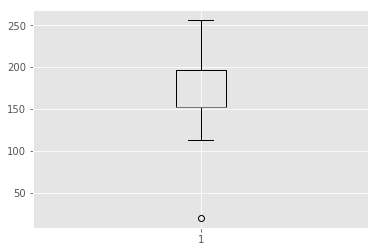

In [434]:
    plt.boxplot(df['Price']);
    plt.savefig('task_3_iqr.png')

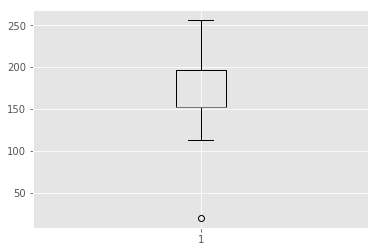

In [435]:
    plt.boxplot(df['Price']);
    plt.savefig('task_3_iqr.png')
    Q1 = df.Price.describe()['25%']
    Q3 = df.Price.describe()['75%']
    IQR = Q3 - Q1
    low_line = Q1 - 1.5 * IQR
    result = df[df.Price < low_line]

In [447]:
result

,Price,Start_Date,Trip_Length,dbscan_labels
15,20.0,15,3,0


In [453]:
len(result)

1

In [450]:
if len(result) == 0:
    return 'No outliers'
else:
    return result

SyntaxError: 'return' outside function (<ipython-input-450-6d580a26b40c>, line 2)

In [462]:
df.Price.describe()

count     90.000000
mean     173.355556
std       41.575790
min       20.000000
25%      153.000000
50%      153.000000
75%      196.000000
max      256.000000
Name: Price, dtype: float64

In [456]:
if a == 0:
    print 'No outliers'
else:
    print result

    Price  Start_Date  Trip_Length  dbscan_labels
15   20.0          15            3              0
